In [118]:
# prompt: donner moi la matrice variance covariance de M

import numpy as np

M = [
    [8, 1, 0],
    [4, 6, 5],
    [6, 8, 7],
    [10, 4, 7],
    [8, 2, 5],
    [0, 3, 6]
]

M = np.array(M)


# Calculate the mean of each column
mean_M = np.mean(M, axis=0)

# Center the data by subtracting the mean
M_centered = M - mean_M

# Calculate the covariance matrix
#covariance_matrix = np.cov(M_centered.T)

M_centered

## Calcul de la matrice de variance-covariance
print("Variance-Covariance Matrix:")
m_cov_car= np.dot(np.transpose(M_centered), M_centered)/6
m_cov_car

Variance-Covariance Matrix:


array([[10.66666667, -1.33333333, -1.33333333],
       [-1.33333333,  5.66666667,  3.66666667],
       [-1.33333333,  3.66666667,  5.66666667]])

Calcul des valeurs propres et des vecteurs  propres de la matrice $A$.

In [119]:
# Calcul des valeurs propres (val) et vecteurs propres (vec) de la matrice variance-covariance
val, vec = np.linalg.eig(m)

In [120]:
sort = np.argsort(val[::-1])
val = val[sort]
vec = vec[:, sort]
val, vec

(array([12.,  8.,  2.]),
 array([[ 8.16496581e-01, -5.77350269e-01, -4.95221942e-19],
        [-4.08248290e-01, -5.77350269e-01, -7.07106781e-01],
        [-4.08248290e-01, -5.77350269e-01,  7.07106781e-01]]))

In [121]:
explained_var = val / np.sum(val)
explained_var

array([0.54545455, 0.36363636, 0.09090909])

In [123]:
# Projection des données sur les deux premières composantes principales
projected_data = M_centered.dot(vec[:,:2])
projected_data

array([[ 4.89897949e+00,  3.46410162e+00],
       [-2.44948974e+00, -4.44089210e-16],
       [-2.44948974e+00, -3.46410162e+00],
       [ 2.44948974e+00, -3.46410162e+00],
       [ 2.44948974e+00,  4.44089210e-16],
       [-4.89897949e+00,  3.46410162e+00]])

In [124]:
# Contribution
(projected_data[:, :1])**2 / (np.linalg.norm(M_centered[:, 1]))**2

array([[0.70588235],
       [0.17647059],
       [0.17647059],
       [0.17647059],
       [0.17647059],
       [0.70588235]])

In [ ]:
(projected_data[:, :1] / np.linalg.norm(M_centered[:, 1]))**2

In [ ]:
(1/6)*M_centered[:]*projected_data / np.std(M_centered) * np.sqrt(val)

ValueError: operands could not be broadcast together with shapes (3,6) (6,2) 


Contributions des individus (en %):
Individu 1:
  - Axe 1: 11.21%
  - Axe 2: 12.97%
Individu 2:
  - Axe 1: 37.39%
  - Axe 2: 7.12%
Individu 3:
  - Axe 1: 7.59%
  - Axe 2: 25.34%
Individu 4:
  - Axe 1: 8.95%
  - Axe 2: 29.89%
Individu 5:
  - Axe 1: 29.05%
  - Axe 2: 5.29%
Individu 6:
  - Axe 1: 5.81%
  - Axe 2: 19.40%


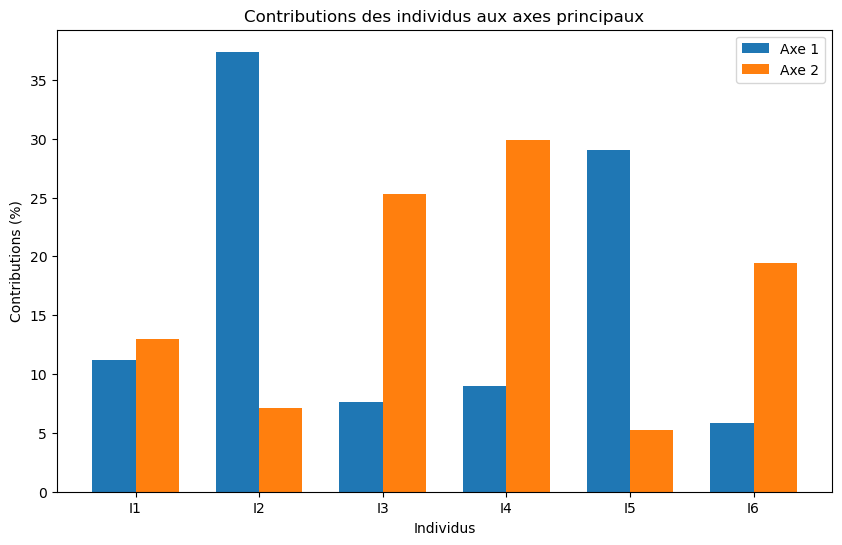

In [117]:
# Calcul des contributions des individus aux axes principaux
def calculate_contributions(principal_components, eigenvalues):
    # Les contributions sont calculées comme le carré des coordonnées divisé par 
    # (n-1) fois la valeur propre correspondante
    n = principal_components.shape[0]
    contributions = np.zeros_like(principal_components)
    
    for j in range(principal_components.shape[1]):
        contributions[:, j] = (principal_components[:, j]**2) / ((n-1) * eigenvalues[j])
    
    # Conversion en pourcentage
    contributions = contributions * 100
    
    return contributions

# Calcul des contributions
contributions = calculate_contributions(principal_components_np, sorted_eigenvalues)

# Affichage des contributions pour chaque individu sur chaque axe
print("\nContributions des individus (en %):")
for i in range(len(contributions)):
    print(f"Individu {i+1}:")
    print(f"  - Axe 1: {contributions[i,0]:.2f}%")
    print(f"  - Axe 2: {contributions[i,1]:.2f}%")

# Visualisation des contributions avec un graphique à barres
plt.figure(figsize=(10, 6))
ind = np.arange(len(contributions))
width = 0.35

plt.bar(ind - width/2, contributions[:, 0], width, label='Axe 1')
plt.bar(ind + width/2, contributions[:, 1], width, label='Axe 2')

plt.xlabel('Individus')
plt.ylabel('Contributions (%)')
plt.title('Contributions des individus aux axes principaux')
plt.xticks(ind, [f'I{i+1}' for i in range(len(contributions))])
plt.legend()

plt.show()

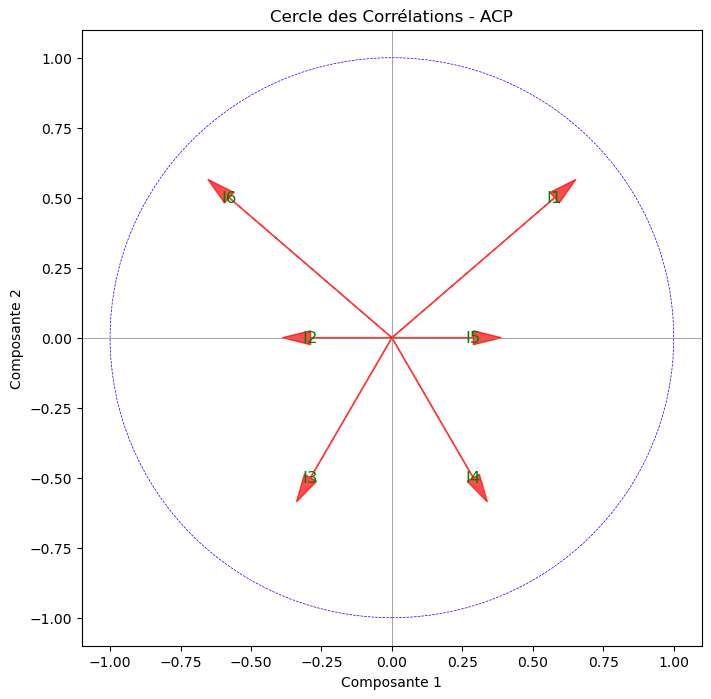

In [112]:
# Code pour créer le cercle des corrélations
import matplotlib.pyplot as plt

# Normalisation des coordonnées pour le cercle des corrélations
norms = np.linalg.norm(projected_data, axis=0)
correlation_circle = projected_data / norms

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=0.5)
ax.add_artist(circle)

# Ajout des vecteurs pour chaque variable avec des labels I1 à I6
variables = ["I1", "I2", "I3", "I4", "I5", "I6"]
for i in range(len(variables)):
    plt.arrow(0, 0, correlation_circle[i, 0], correlation_circle[i, 1], 
              color='r', alpha=0.7, head_width=0.05, head_length=0.1)
    plt.text(correlation_circle[i, 0], correlation_circle[i, 1], variables[i], 
             color='g', ha='center', va='center', fontsize=12)

# Configuration du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Cercle des Corrélations - ACP")
plt.grid(False)
plt.show()

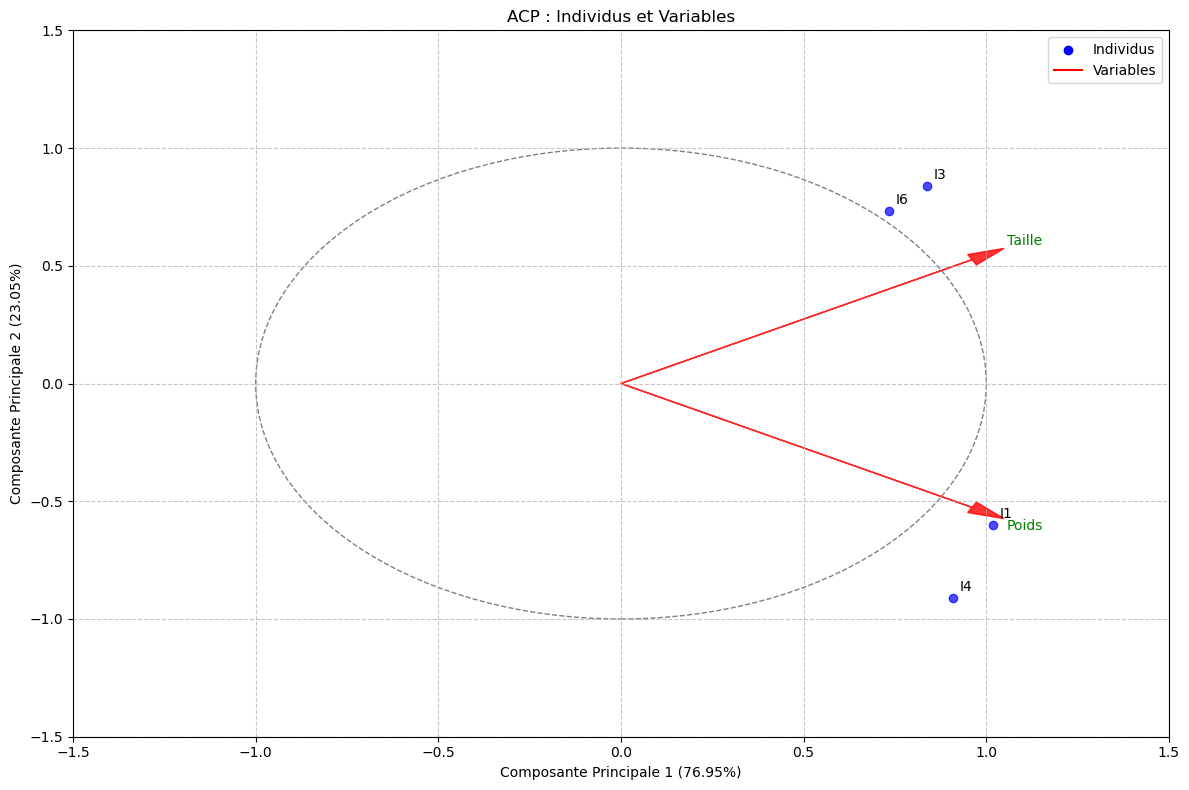

In [126]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_pca(principal_components, correlation_circle, explained_variance, variable_names):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Tracer les individus
    ax.scatter(principal_components[:, 0], principal_components[:, 1], color='blue', alpha=0.7)
    for i, txt in enumerate(["I1", "I2", "I3", "I4", "I5", "I6"]):
        ax.annotate(txt, (principal_components[i, 0], principal_components[i, 1]), xytext=(5,5), textcoords='offset points')

    # Tracer les variables
    for i, (x, y) in enumerate(correlation_circle):
        ax.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.05, head_length=0.1)
        ax.text(x*1.15, y*1.15, variable_names[i], color='green', ha='center', va='center')

    # Tracer le cercle de corrélation
    circle = plt.Circle((0,0), 1, fill=False, linestyle='--', color='gray')
    ax.add_artist(circle)

    # Configurer les axes
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel(f"Composante Principale 1 ({explained_variance[0]:.2%})")
    ax.set_ylabel(f"Composante Principale 2 ({explained_variance[1]:.2%})")
    ax.set_title("ACP : Individus et Variables")
    ax.grid(True, linestyle='--', alpha=0.7)

    # Ajouter une légende
    ax.scatter([], [], color='blue', label='Individus')
    ax.plot([], [], color='red', label='Variables')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Calcul du cercle des corrélations
correlation_circle = sorted_eigenvectors[:, :2] * np.sqrt(sorted_eigenvalues[:2])

# Noms des variables
variable_names = ["Poids", "Taille"]

# Appel de la fonction
plot_combined_pca(principal_components_np, correlation_circle, explained_variance_np, variable_names)

## Données 2
Soit un ensemble de 6 individus dont on a mesuré leur taille et leur poids

In [4]:
# Normalisation des données
data_matrix = np.array([
    [20, 15],
    [5, 2],
    [12, 21],
    [21, 13],
    [2, 7],
    [12, 20]
])

## Normalisation des données :
La normalisation est effectuée en soustrayant la moyenne de chaque valeur et en divisant le résultat par l'écart-type. Cela permet de mettre toutes les variables sur la même échelle, ce qui est important dans l'ACP.

In [130]:
# Moyenne
mean = np.mean(data_matrix, axis=0)

# Ecart-type
std_dev = np.std(data_matrix, axis=0)

# Normalisation
normalized_data = (data_matrix - mean) / std_dev

normalized_data


array([[ 1.14285714,  0.29595817],
       [-1.        , -1.62776996],
       [ 0.        ,  1.1838327 ],
       [ 1.28571429,  0.        ],
       [-1.42857143, -0.88787452],
       [ 0.        ,  1.03585361]])

In [133]:
center = data_matrix - mean
np.dot(np.transpose(center), center)/6

array([[49.        , 25.5       ],
       [25.5       , 45.66666667]])

## Calcul de la matrice de covariance :
Une fois les données normalisées, nous avons calculé la matrice de covariance cov_matrix des données transposées (chaque colonne représentant une variable). La matrice de covariance capture la relation entre les différentes variables (Poids et Taille).

In [135]:
cov_m = np.dot(np.transpose(normalized_data), normalized_data)/(len(normalized_data))
cov_m

# En utilisant cov
#cov_matrix = np.cov(normalized_data.T)
#cov_matrix

array([[1.        , 0.53906667],
       [0.53906667, 1.        ]])

## Calcul des valeurs propres et des vecteurs propres :
En utilisant la matrice de covariance, nous avons calculé les valeurs propres et les vecteurs propres. Les valeurs propres indiquent la quantité de variance expliquée par chaque composante, tandis que les vecteurs propres représentent les directions de ces composantes.

In [136]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)
(eigenvalues, eigenvectors)


(array([1.53906667, 0.46093333]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

La somme des valeurs propres doit être égale à 2

In [137]:
sum(eigenvalues)

2.0

In [142]:
eigenvalues / 2

array([0.76953334, 0.23046666])

## Tri des valeurs propres et des vecteurs propres :

Nous avons trié les valeurs propres et les vecteurs propres dans l'ordre décroissant des valeurs propres pour identifier les deux composantes principales qui expliquent le maximum de variance.

In [138]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

## Projection des données :

Les données normalisées ont été projetées sur les deux premières composantes principales en multipliant les données normalisées par les deux premiers vecteurs propres.

In [143]:
principal_components_np = normalized_data.dot(sorted_eigenvectors[:, :1])
principal_components_np

array([[ 1.01739607],
       [-1.85811396],
       [ 0.83709613],
       [ 0.90913729],
       [-1.63797464],
       [ 0.73245911]])

## Calcul de la variance expliquée :

Enfin, nous avons calculé la proportion de variance expliquée par chaque composante principale en divisant chaque valeur propre par la somme des valeurs propres totales.

In [21]:
explained_variance_np = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance_np

array([0.76953334, 0.23046666])

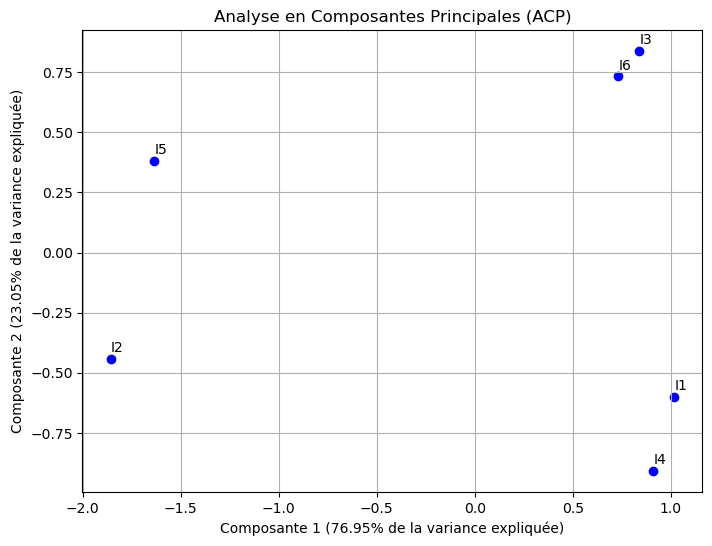

In [140]:
import matplotlib.pyplot as plt

# Extraction des données projetées sur les composantes principales
x_values = principal_components_np[:, 0]  # Composante 1
y_values = principal_components_np[:, 1]  # Composante 2

# Création du graphique de dispersion
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color="blue", marker="o")

# Ajouter des annotations pour chaque point
for i, label in enumerate(["I1", "I2", "I3", "I4", "I5", "I6"]):
    plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Ajout des labels et du titre
plt.xlabel(f"Composante 1 ({explained_variance_np[0]:.2%} de la variance expliquée)")
plt.ylabel(f"Composante 2 ({explained_variance_np[1]:.2%} de la variance expliquée)")
plt.title("Analyse en Composantes Principales (ACP)")

# Affichage du graphique
plt.grid(True)
plt.show()


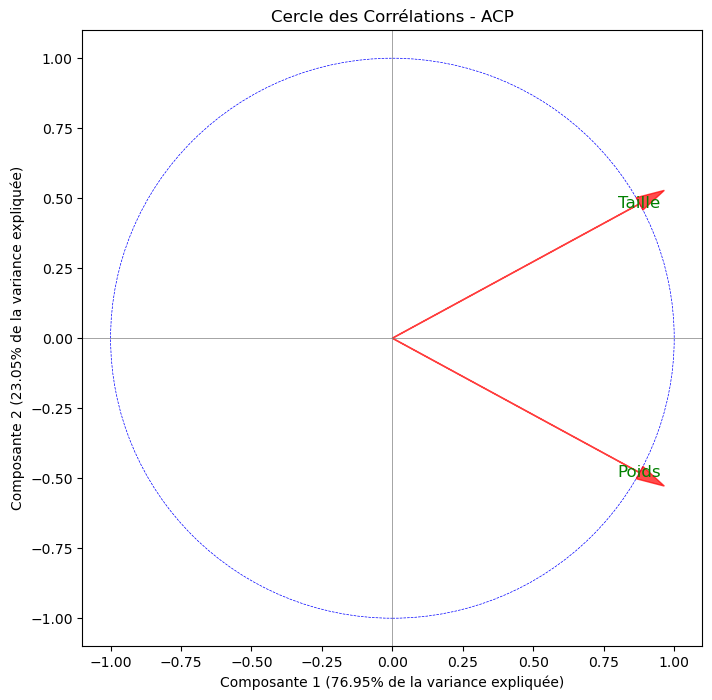

In [141]:
import matplotlib.pyplot as plt

# Calcul des coordonnées des variables dans le cercle des corrélations
correlation_circle = sorted_eigenvectors * np.sqrt(sorted_eigenvalues)

# Création du cercle
fig, ax = plt.subplots(figsize=(8, 8))

# Tracé du cercle de rayon 1
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=0.5)
ax.add_artist(circle)

# Tracé des vecteurs pour chaque variable
variables = ["Poids", "Taille"]
for i in range(len(variables)):
    plt.arrow(0, 0, correlation_circle[i, 0], correlation_circle[i, 1], 
              color='r', alpha=0.7, head_width=0.05, head_length=0.1)
    plt.text(correlation_circle[i, 0], correlation_circle[i, 1], variables[i], 
             color='g', ha='center', va='center', fontsize=12)

# Définition des limites du graphique et des axes
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Labels et titre
plt.xlabel(f"Composante 1 ({explained_variance_np[0]:.2%} de la variance expliquée)")
plt.ylabel(f"Composante 2 ({explained_variance_np[1]:.2%} de la variance expliquée)")
plt.title("Cercle des Corrélations - ACP")
plt.grid(False)
plt.show()
